In [11]:
!pip install numpy pandas matplotlib scikit-learn statsmodels


#numpy and pandas for data manipulation.
#matplotlib for data visualization.
#scikit-learn for linear regression.
#statsmodels for ARIMA modeling.


# Import Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


#LinearRegression: For regression modeling.
#mean_squared_error and r2_score: To evaluate model performance.
#ARIMA: For time series forecasting.

# Load and Explore the Dataset

In [16]:
#Load the crude oil price dataset from the Energy Information Administration (EIA)

# Load the dataset
df = pd.read_csv(r'E:\crude-oil-price.csv', parse_dates=['date'], index_col='date')

# Display the first few rows
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())




#parse_dates: Ensures that the Date column is parsed as a date.
#index_col: Sets the Date column as the DataFrame index.
#describe(): Provides a summary of statistics for the dataset.
#bisnull().sum(): Identifies missing values.

                           price  percentChange  change
date                                                   
1983-06-01 00:00:00+00:00  31.38            NaN     NaN
1983-07-01 00:00:00+00:00  32.00          1.976    0.62
1983-08-01 00:00:00+00:00  31.59         -1.281   -0.41
1983-09-01 00:00:00+00:00  30.36         -3.894   -1.23
1983-10-01 00:00:00+00:00  30.37          0.033    0.01
            price  percentChange      change
count  495.000000     494.000000  494.000000
mean    46.365849       0.706423    0.081866
std     29.062466      10.511119    4.978262
min     10.420000     -54.245000  -32.830000
25%     20.420000      -5.450500   -1.740000
50%     33.750000       0.903000    0.245000
75%     69.670000       6.360750    2.397500
max    140.000000      88.376000   16.650000
price            0
percentChange    1
change           1
dtype: int64


# Data Preprocessing

C:\Users\pradu\AppData\Local\Temp\ipykernel_17204\1276510090.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


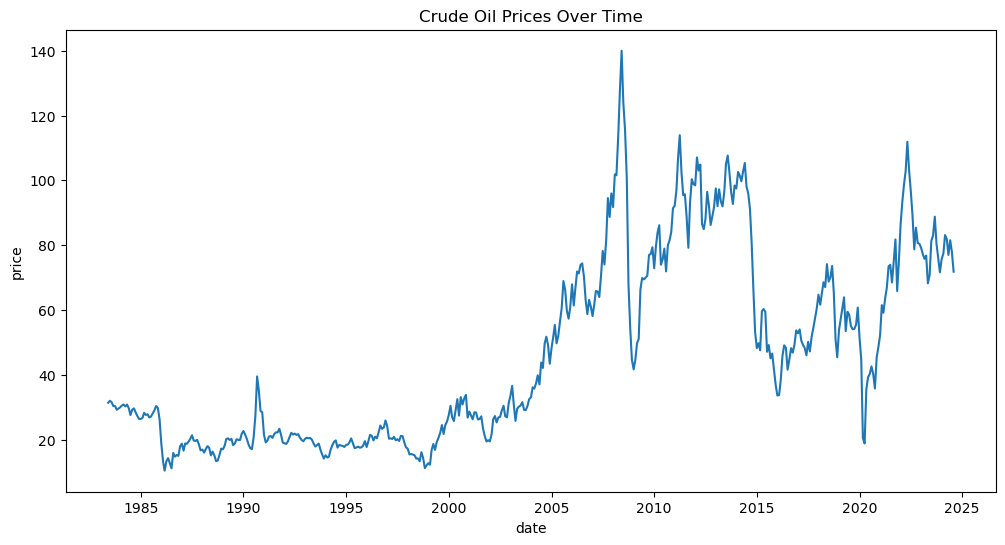

In [20]:
#Handle missing data and prepare the dataset for modeling.

# Fill missing values with forward fill method
df.fillna(method='ffill', inplace=True)

# Plot crude oil prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['price'])
plt.title('Crude Oil Prices Over Time')
plt.xlabel('date')
plt.ylabel('price')
plt.show()




#fillna(method='ffill'): Replaces missing values with the last available value.
#A line plot visualizes crude oil prices over time.

# Train-Test Split

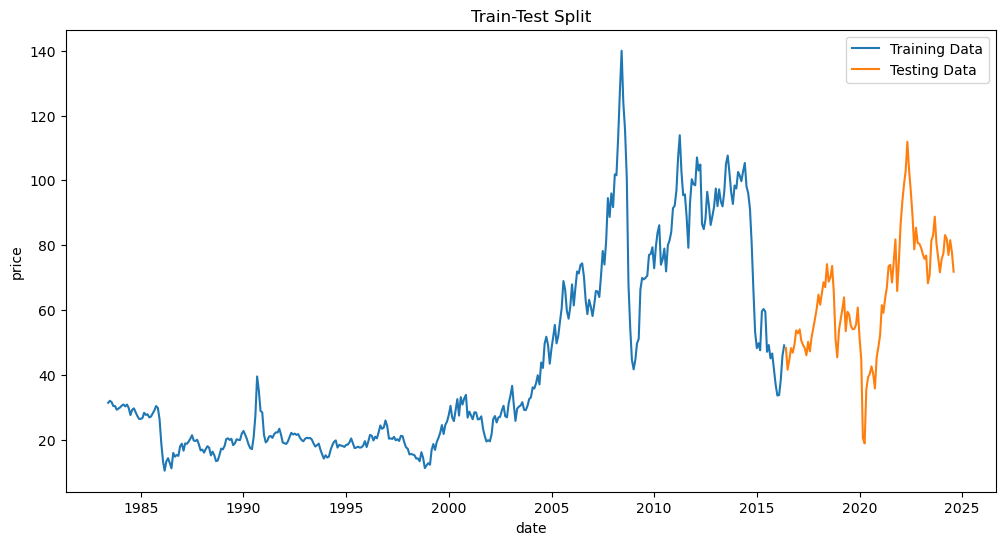

In [23]:
#Split the data into training and testing sets.


# Use the last 20% of the data for testing
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Visualize the train-test split
plt.figure(figsize=(12, 6))
plt.plot(train['price'], label='Training Data')
plt.plot(test['price'], label='Testing Data')
plt.title('Train-Test Split')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.show()



#The data is split into 80% for training and 20% for testing.
#A plot shows the division between training and testing data.

# Time Series Analysis with ARIMA

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


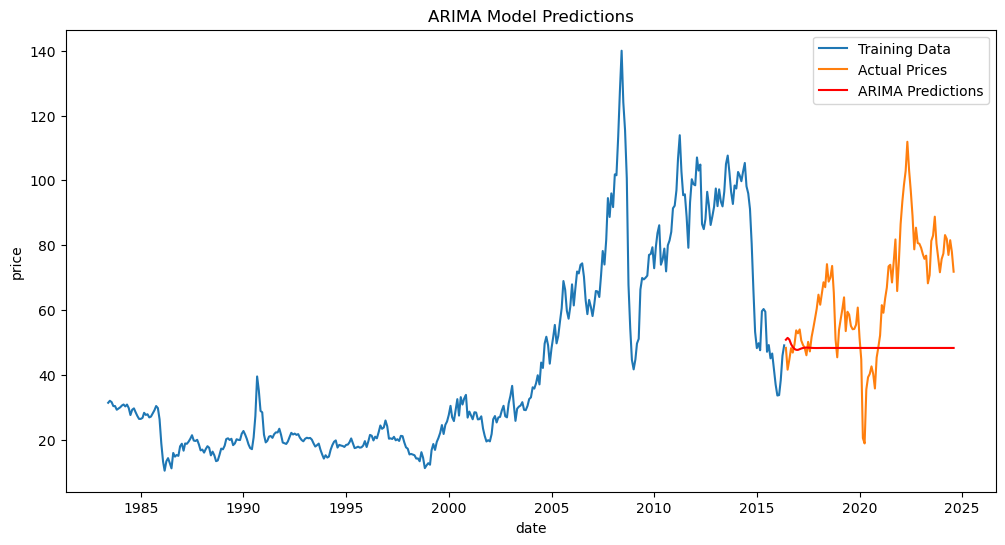

ARIMA RMSE: 23.693536050123345


In [26]:
#Model the time series using ARIMA.


# Fit an ARIMA model
arima_model = ARIMA(train['price'], order=(5, 1, 0))
arima_result = arima_model.fit()

# Make predictions
arima_forecast = arima_result.predict(start=len(train), end=len(df)-1, dynamic=False)

# Plot the predictions against actual data
plt.figure(figsize=(12, 6))
plt.plot(train['price'], label='Training Data')
plt.plot(test['price'], label='Actual Prices')
plt.plot(test.index, arima_forecast, label='ARIMA Predictions', color='red')
plt.title('ARIMA Model Predictions')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.show()

# Evaluate the ARIMA model
arima_rmse = np.sqrt(mean_squared_error(test['price'], arima_forecast))
print(f'ARIMA RMSE: {arima_rmse}')


#ARIMA model order (5, 1, 0) is chosen.
#Predictions are made on the test set.
#The plot compares ARIMA predictions with actual prices.
#RMSE (Root Mean Squared Error) evaluates model performance.

# Linear Regression Model

In [29]:
#Create a linear regression model for price prediction.

# Prepare the data for regression
df['days'] = (df.index - df.index[0]).days
X = df[['days']]
y = df['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)




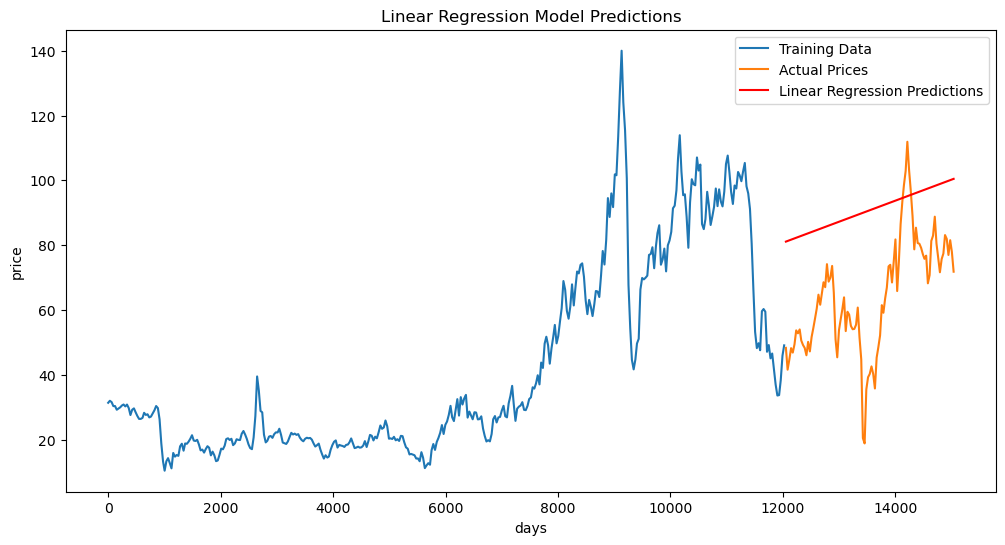

In [31]:
# Plot predictions against actual data
plt.figure(figsize=(12, 6))
plt.plot(X_train['days'], y_train, label='Training Data')
plt.plot(X_test['days'], y_test, label='Actual Prices')
plt.plot(X_test['days'], lr_predictions, label='Linear Regression Predictions', color='red')
plt.title('Linear Regression Model Predictions')
plt.xlabel('days')
plt.ylabel('price')
plt.legend()
plt.show()




In [33]:
# Evaluate the Linear Regression model
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)
print(f'Linear Regression RMSE: {lr_rmse}')
print(f'Linear Regression R^2: {lr_r2}')

Linear Regression RMSE: 30.30644072895916
Linear Regression R^2: -1.9992959607184315


# Hybrid Model (ARIMA + Linear Regression)

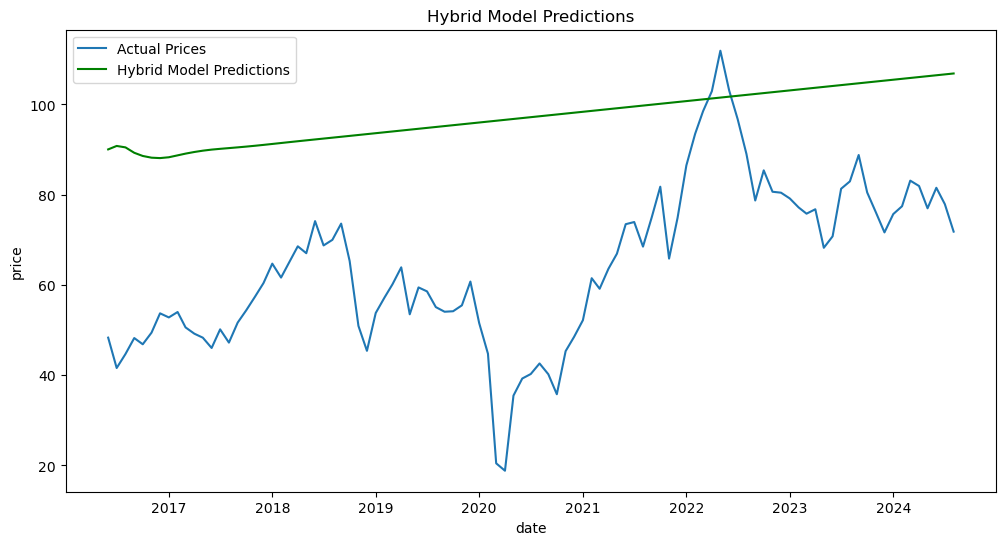

Hybrid Model RMSE: 36.14803018807766


In [36]:
# Combine ARIMA and Linear Regression predictions
hybrid_forecast = arima_forecast + lr_predictions - y_train.mean()

# Plot the hybrid model predictions
plt.figure(figsize=(12, 6))
plt.plot(test['price'], label='Actual Prices')
plt.plot(test.index, hybrid_forecast, label='Hybrid Model Predictions', color='green')
plt.title('Hybrid Model Predictions')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.show()

# Evaluate the Hybrid model
hybrid_rmse = np.sqrt(mean_squared_error(test['price'], hybrid_forecast))
print(f'Hybrid Model RMSE: {hybrid_rmse}')


#Hybrid predictions are calculated by combining ARIMA and Linear Regression outputs.
#Predictions are visualized, and RMSE evaluates performance.

# Data Visualization

# 1. Histogram

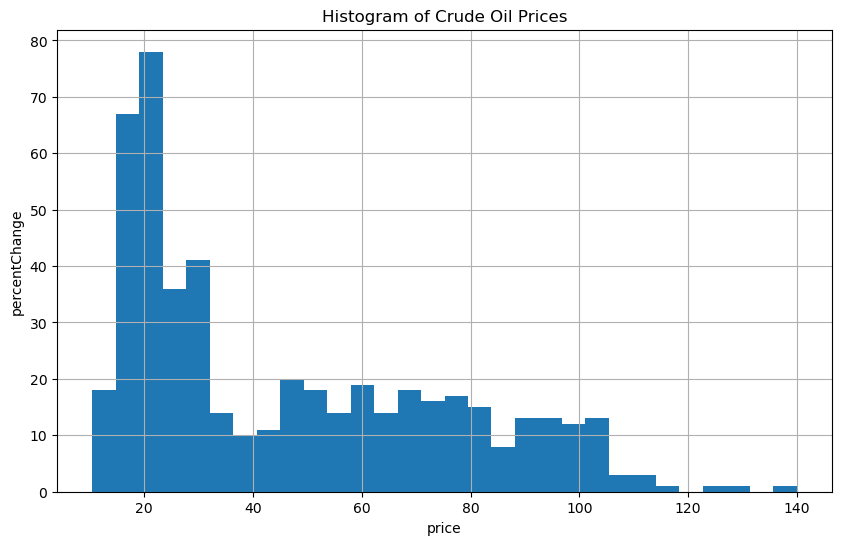

In [40]:
# Plot histogram of crude oil prices
plt.figure(figsize=(10, 6))
df['price'].hist(bins=30)
plt.title('Histogram of Crude Oil Prices')
plt.xlabel('price')
plt.ylabel('percentChange')
plt.show()


#Histogram shows the distribution of crude oil prices.


# 2. Scattered Plot

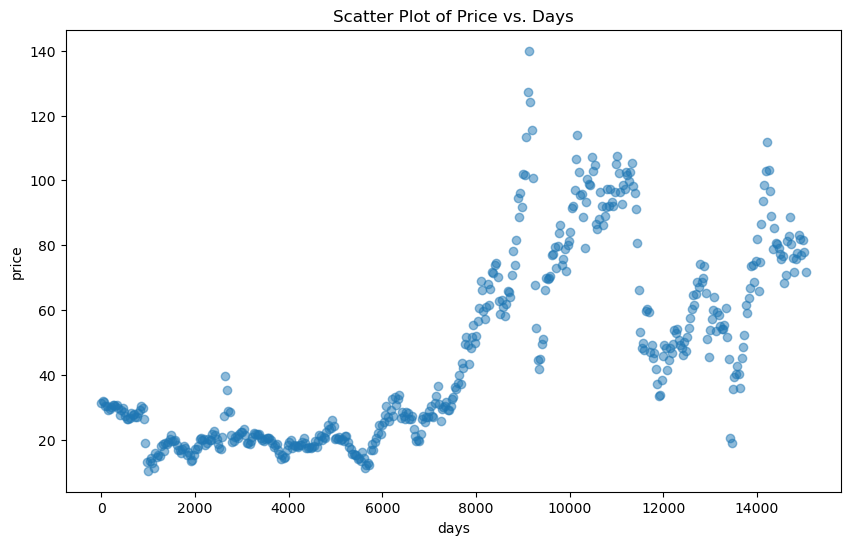

In [43]:
# Scatter plot of price vs. days
plt.figure(figsize=(10, 6))
plt.scatter(X['days'], y, alpha=0.5)
plt.title('Scatter Plot of Price vs. Days')
plt.xlabel('days')
plt.ylabel('price')
plt.show()



#Scatter plot visualizes the relationship between days and prices.


# Pie Chart

C:\Users\pradu\AppData\Local\Temp\ipykernel_17204\332079591.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['price'].resample('M').mean()


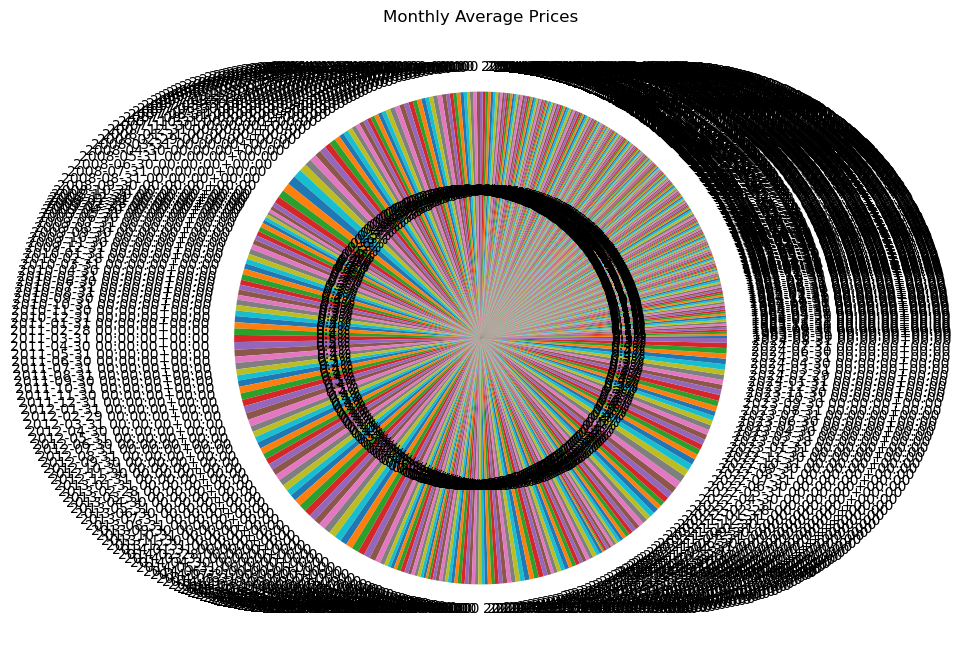

In [46]:
# Pie chart of monthly average prices (example: if monthly data is available)
monthly_avg = df['price'].resample('M').mean()
monthly_avg.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Monthly Average Prices')
plt.ylabel('')
plt.show()



#Pie chart represents monthly average prices if the data is resampled monthly.


# Save and Load Models

In [48]:
#Save the models for future use.

import joblib

# Save the ARIMA and Linear Regression models
joblib.dump(arima_result, 'arima_model.pkl')
joblib.dump(lr_model, 'linear_regression_model.pkl')

# Load the models
loaded_arima = joblib.load('arima_model.pkl')
loaded_lr = joblib.load('linear_regression_model.pkl')

# Use the loaded models to make predictions
arima_loaded_forecast = loaded_arima.predict(start=len(train), end=len(df)-1, dynamic=False)
lr_loaded_predictions = loaded_lr.predict(X_test)



#Models are saved using joblib.
#Models can be reloaded for future predictions.

In [49]:
'''
Summary
Step 1: Install libraries.
Step 2: Import libraries.
Step 3: Load and explore the dataset.
Step 4: Data preprocessing.
Step 5: Train-test split.
Step 6: Time series analysis with ARIMA.
Step 7: Linear regression modeling.
Step 8: Combine models into a hybrid model.
Step 9: Data visualization.
Step 10: Save and load models.
'''

'\nSummary\nStep 1: Install libraries.\nStep 2: Import libraries.\nStep 3: Load and explore the dataset.\nStep 4: Data preprocessing.\nStep 5: Train-test split.\nStep 6: Time series analysis with ARIMA.\nStep 7: Linear regression modeling.\nStep 8: Combine models into a hybrid model.\nStep 9: Data visualization.\nStep 10: Save and load models.\n'